## WeatherPy
### - Cities that are in the range of +- 20 degrees of the equator (0 degree latitude) are the hottest.
### - Cities that are above 60 degree latitude are more likely to be humid.
### - Hard to deduce any info regarding wind speed or cloudiness compared to latitude with this data.

In [1]:
# dependencies
import requests as req
import datetime
import time
import json
import getpass
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
# base url & personal api key
url = "http://api.openweathermap.org/data/2.5/weather"
api_key = getpass.getpass("copy and paste your openweathermap.com api key: ")
df = pd.DataFrame(columns = ['City','Country','Date','Latitude','Longitude',
                            'Max_Temp','Humidity','Cloudiness','Wind_Speed'])
df

copy and paste your openweathermap.com api key: ········


,City,Country,Date,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed


## Generate Cities List

In [3]:
# 3000 sets of lat & long
lat_list = map(lambda x: x / 100, random.sample(range(-9000,9000), 3000))
lng_list = map(lambda x: x / 100, random.sample(range(-18000,18000), 3000))
latlng = list(zip(lat_list,lng_list))

# UNIQUE list of cities from above 3000 sets of lat & long
cities = list(set(list(
    map(lambda x: x.city_name, 
        [citipy.nearest_city(latlng[i][0],latlng[i][1]) for i in range(len(latlng))]))))

## Perform API Calls

In [4]:
# api calls of 500 unique cities and adding necessary data to df
for i in range(500):
    query_url = "{}?appid={}&q={}".format(url,api_key,cities[i])
    if i%50 == 0:
        time.sleep(50)
        
    try:
        weather_json = req.get(query_url).json()
        print("*"*50)
        print("API Call {} | City Number: {}, City Name: {}".format(i+1,
                                    weather_json['id'],weather_json['name']))
        print(query_url)
    except:
        print("API call fail T.T")
        break
    
    try:
        df.set_value(i,'City',weather_json['name'])
        df.set_value(i,'Country',weather_json['sys']['country'])
        df.set_value(i,'Date',datetime.datetime.fromtimestamp(weather_json['dt']))
        df.set_value(i,'Latitude',weather_json['coord']['lat'])
        df.set_value(i,'Longitude',weather_json['coord']['lon'])
        df.set_value(i,'Max_Temp',weather_json['main']['temp_max'])
        df.set_value(i,'Humidity',weather_json['main']['humidity'])
        df.set_value(i,'Cloudiness',weather_json['clouds']['all'])
        df.set_value(i,'Wind_Speed',weather_json['wind']['speed'])
    except:
        print('error T.T')
        continue
        
# Save the DataFrame as a csv
df.to_csv("0_WeatherOf500Cities.csv", encoding="utf-8", index=False)
df.head()

**************************************************
API Call 1 | City Number: 2067089, City Name: Maningrida
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=maningrida
**************************************************
API Call 2 | City Number: 5983607, City Name: Inuvik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=inuvik
**************************************************
API Call 3 | City Number: 3424607, City Name: Tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tasiilaq
**************************************************
API Call 4 | City Number: 3461724, City Name: Gurupi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=formoso do araguaia
**************************************************
API Call 5 | City Number: 2141305, City Name: Fayaoue
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece

**************************************************
API Call 42 | City Number: 1282826, City Name: Salyan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=halalo
**************************************************
API Call 43 | City Number: 2649738, City Name: Fairlie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=fairlie
**************************************************
API Call 44 | City Number: 3108950, City Name: Silleda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=silleda
**************************************************
API Call 45 | City Number: 2025630, City Name: Chara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chara
**************************************************
API Call 46 | City Number: 1790437, City Name: Zhuhai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=zhuha

**************************************************
API Call 82 | City Number: 648057, City Name: Lieto
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lieto
**************************************************
API Call 83 | City Number: 1914158, City Name: Xiasi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hanyang
**************************************************
API Call 84 | City Number: 6929460, City Name: Panzhihua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=panzhihua
**************************************************
API Call 85 | City Number: 315530, City Name: Ercis
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ercis
**************************************************
API Call 86 | City Number: 1856392, City Name: Muroto
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=muroto


**************************************************
API Call 123 | City Number: 660083, City Name: Etu-Töölö
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tall kayf
**************************************************
API Call 124 | City Number: 103630, City Name: Najran
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=najran
**************************************************
API Call 125 | City Number: 2641434, City Name: Northam
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=northam
**************************************************
API Call 126 | City Number: 3353383, City Name: Rundu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rundu
**************************************************
API Call 127 | City Number: 2018735, City Name: Nyurba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&

**************************************************
API Call 163 | City Number: 1506676, City Name: Gari
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gari
**************************************************
API Call 164 | City Number: 4020109, City Name: Atuona
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=atuona
**************************************************
API Call 165 | City Number: 80509, City Name: Bardiyah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bardiyah
**************************************************
API Call 166 | City Number: 5919850, City Name: Chapais
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chapais
**************************************************
API Call 167 | City Number: 2177069, City Name: Ballina
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=b

**************************************************
API Call 203 | City Number: 3154704, City Name: Grua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=grua
**************************************************
API Call 204 | City Number: 338726, City Name: Dodola
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dodola
**************************************************
API Call 205 | City Number: 6545720, City Name: Temara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=temaraia
**************************************************
API Call 206 | City Number: 2014624, City Name: Udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=udachnyy
**************************************************
API Call 207 | City Number: 2240449, City Name: Luanda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=l

**************************************************
API Call 243 | City Number: 3353540, City Name: Rehoboth
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rehoboth
**************************************************
API Call 244 | City Number: 1516048, City Name: Hovd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hovd
**************************************************
API Call 245 | City Number: 1529484, City Name: Hami
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hami
**************************************************
API Call 246 | City Number: 3831208, City Name: Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=qaanaaq
**************************************************
API Call 247 | City Number: 2243271, City Name: Cabinda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cab

**************************************************
API Call 284 | City Number: 3346015, City Name: Sumbe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sumbe
**************************************************
API Call 285 | City Number: 3740016, City Name: Ti Port-de-Paix
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=port-de-paix
**************************************************
API Call 286 | City Number: 240210, City Name: Birao
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=birao
**************************************************
API Call 287 | City Number: 5882953, City Name: Aklavik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=aklavik
**************************************************
API Call 288 | City Number: 5977046, City Name: Hornepayne
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece

**************************************************
API Call 324 | City Number: 3115824, City Name: Muros
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=muros
**************************************************
API Call 325 | City Number: 5866063, City Name: Kenai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kenai
**************************************************
API Call 326 | City Number: 877153, City Name: Kosheshe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kachikau
**************************************************
API Call 327 | City Number: 3987619, City Name: San Bartolo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san bartolo
**************************************************
API Call 328 | City Number: 3369157, City Name: Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0

**************************************************
API Call 364 | City Number: 1762882, City Name: Kampong Tengah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sri aman
**************************************************
API Call 365 | City Number: 2155472, City Name: Newcastle
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=newcastle
**************************************************
API Call 366 | City Number: 3522164, City Name: Palenque
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=palenque
**************************************************
API Call 367 | City Number: 2084442, City Name: Vanimo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vanimo
**************************************************
API Call 368 | City Number: 1267390, City Name: Kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f

**************************************************
API Call 404 | City Number: 974670, City Name: Mondlo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mondlo
**************************************************
API Call 405 | City Number: 1270996, City Name: Gonda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ginda
**************************************************
API Call 406 | City Number: 4197055, City Name: Gibson
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=avera
**************************************************
API Call 407 | City Number: 3547930, City Name: Mantua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mantua
**************************************************
API Call 408 | City Number: 1493756, City Name: Razdolinsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yu

**************************************************
API Call 444 | City Number: 2171099, City Name: Codrington
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=codrington
**************************************************
API Call 445 | City Number: 6943832, City Name: Riviere-au-Renard
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=riviere-au-renard
**************************************************
API Call 446 | City Number: 2016307, City Name: Solnechnyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=solnechnyy
**************************************************
API Call 447 | City Number: 3670218, City Name: San Andres
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san andres
**************************************************
API Call 448 | City Number: 6148373, City Name: Sioux Lookout
http://api.openweathermap.org/data/2.

**************************************************
API Call 484 | City Number: 3471451, City Name: Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=arraial do cabo
**************************************************
API Call 485 | City Number: 656130, City Name: Jakobstad
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pietarsaari
**************************************************
API Call 486 | City Number: 5712169, City Name: Baker City
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=baker city
**************************************************
API Call 487 | City Number: 755474, City Name: Wlodawa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=wlodawa
**************************************************
API Call 488 | City Number: 1687894, City Name: Santa Rosa
http://api.openweathermap.org/data/2.5/weather?appid

,City,Country,Date,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,Maningrida,AU,2017-09-14 12:36:43,-12.07,134.27,297.506,70,8,6.71
1,Inuvik,CA,2017-09-14 12:00:00,68.35,-133.72,286.15,62,75,3.86
2,Tasiilaq,GL,2017-09-14 11:50:00,65.61,-37.64,278.15,80,75,5.1
3,Gurupi,BR,2017-09-14 12:36:45,-11.73,-49.07,307.706,33,0,3.66
4,Fayaoue,NC,2017-09-14 12:36:45,-20.65,166.53,296.706,100,8,3.46


## Latitude vs Temperature Plot

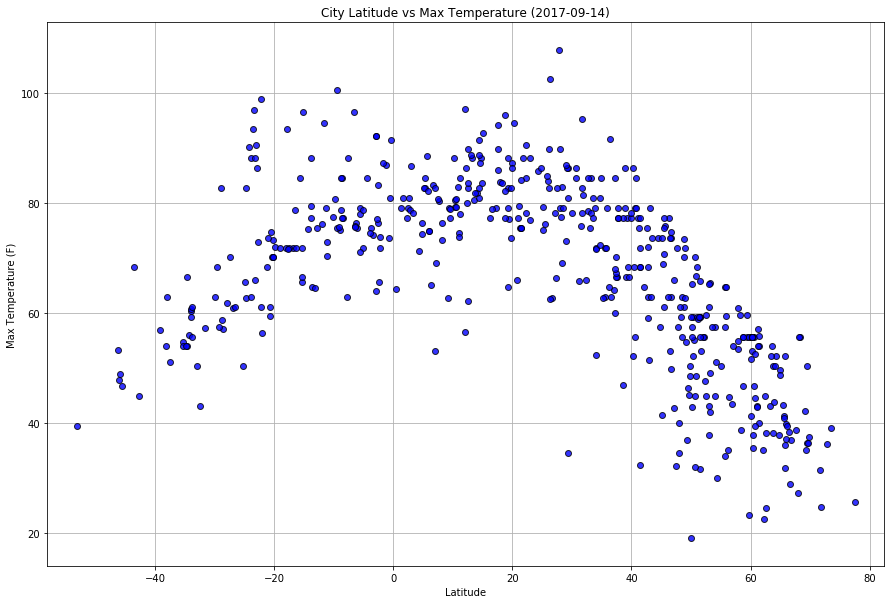

In [5]:
plt.figure(figsize=(15,10))
for i in range(len(df['Latitude'])):
    plt.plot(df["Latitude"].iloc[i],(9/5 * (df["Max_Temp"].iloc[i]-273) + 32),marker="o",markeredgecolor='black',
             color='blue',alpha=0.8)
    
plt.title("City Latitude vs Max Temperature ({})".format(str(df['Date'].iloc[0]).split(' ')[0]))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(df['Latitude'])- 5, max(df['Latitude'])+ 5])
plt.ylim([min(9/5 * (df['Max_Temp']-273) + 32) - 5, max(9/5 * (df['Max_Temp']-273) + 32) + 5])

plt.savefig("1_LatvsTemp.png")
plt.show()

## Latitude vs Humidity Plot

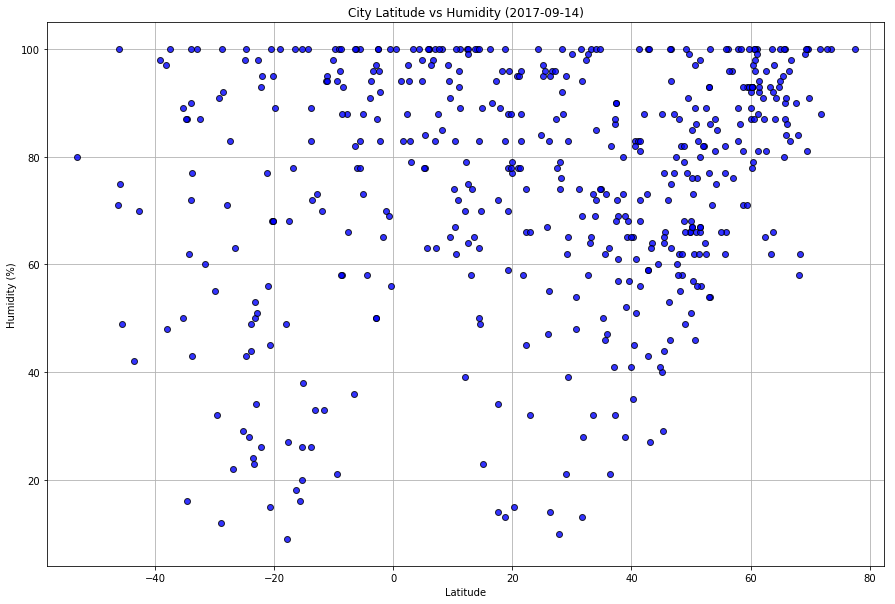

In [6]:
plt.figure(figsize=(15,10))
for i in range(len(df['Latitude'])):
    plt.plot(df["Latitude"].iloc[i],df['Humidity'].iloc[i],marker="o",markeredgecolor='black',
             color='blue',alpha=0.8)
    
plt.title("City Latitude vs Humidity ({})".format(str(df['Date'].iloc[0]).split(' ')[0]))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(df['Latitude']) - 5, max(df['Latitude']) + 5])
plt.ylim([min(df['Humidity']) - 5, max(df['Humidity']) + 5])

plt.savefig("2_LatvsHum.png")
plt.show()

## Latitude vs Cloudiness Plot

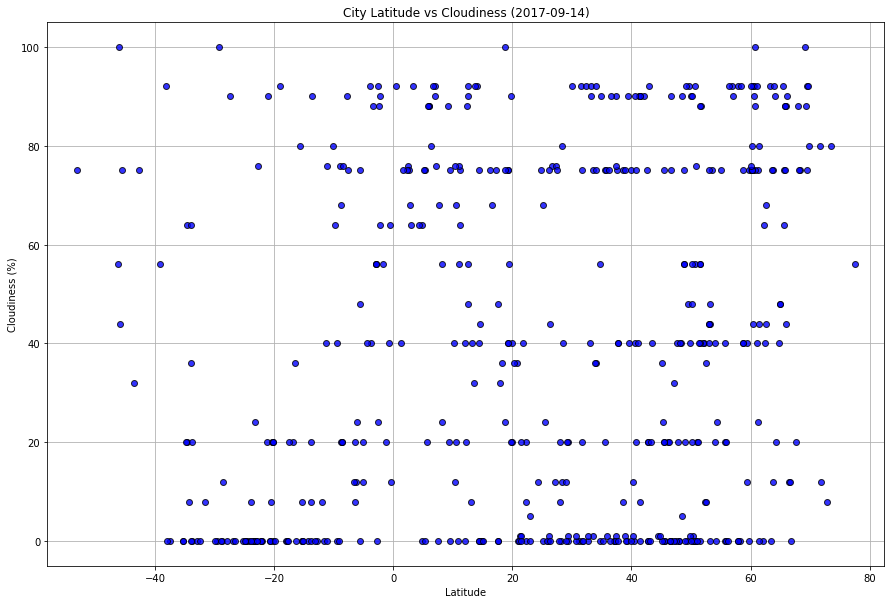

In [7]:
plt.figure(figsize=(15,10))
for i in range(len(df['Latitude'])):
    plt.plot(df["Latitude"].iloc[i],df['Cloudiness'].iloc[i],marker="o",markeredgecolor='black',
             color='blue',alpha=0.8)
    
plt.title("City Latitude vs Cloudiness ({})".format(str(df['Date'].iloc[0]).split(' ')[0]))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(df['Latitude']) - 5, max(df['Latitude']) + 5])
plt.ylim([min(df['Cloudiness']) - 5, max(df['Cloudiness']) + 5])

plt.savefig("3_LatvsCloud.png")
plt.show()

## Latitude vs Wind Speed Plot

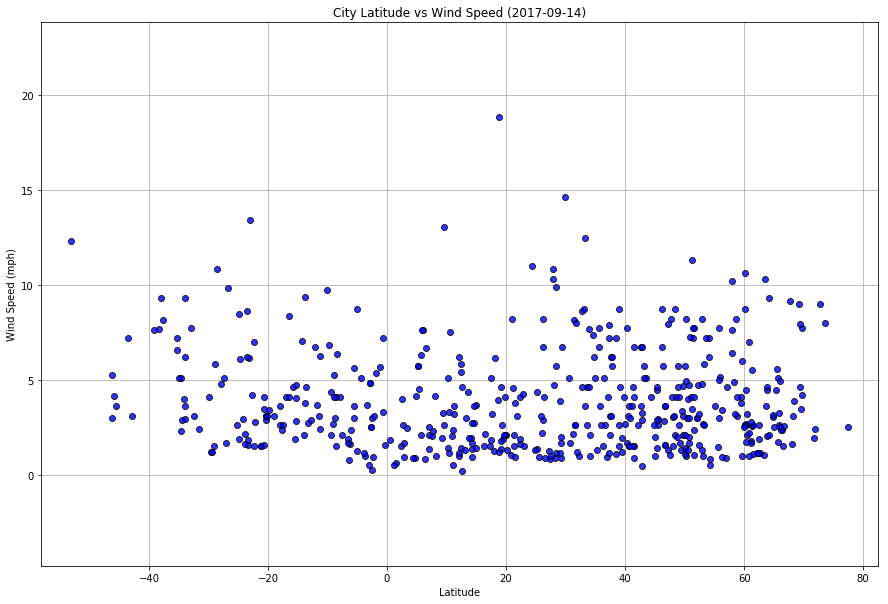

In [8]:
plt.figure(figsize=(15,10))
for i in range(len(df['Latitude'])):
    plt.plot(df["Latitude"].iloc[i],df['Wind_Speed'].iloc[i],marker="o", markeredgecolor='black',
             color='blue',alpha=0.8)
    
plt.title("City Latitude vs Wind Speed ({})".format(str(df['Date'].iloc[0]).split(' ')[0]))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(df['Latitude']) - 5, max(df['Latitude']) + 5])
plt.ylim([min(df['Wind_Speed']) - 5, max(df['Wind_Speed']) + 5])

plt.savefig("4_LatvsWind.png")
plt.show()